# Data Collection

In [1]:
import kagglehub
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

100%|██████████| 368k/368k [00:00<00:00, 11.3MB/s]

Extracting files...


In [2]:
import os

print(os.listdir(path))

['credit_risk_dataset.csv']


In [3]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "credit_risk_dataset.csv"))
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [5]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [6]:
print(df.describe(include=["int64", "float64"]))

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [7]:
print(df.describe(include="object"))

       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836


In [8]:
# Any duplicates
print(df.duplicated().sum())

165


In [9]:

# person emp length
print(df["person_emp_length"].unique())

[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]


Note- How can persons emp lenght could be 123 yr which is highly unusual and likely an outlier or data entry error. We the help of unique we can only see one such extreme will handle this with median cause its robust to outliers as compared to mean.

In [10]:
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].mean())

print(df["person_emp_length"].describe())

count    32581.000000
mean         4.789686
std          4.085333
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64


Note- Yep its decent than before, we move further

In [11]:
# loan interest
print(df["loan_int_rate"].unique()[:50])

[16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74 10.37  8.63
  7.9  18.39 10.65 20.25 18.25 10.99  7.49 16.77 17.58  7.29 14.54 12.68
 17.74  9.32  9.99 12.84 11.12  6.62 14.17 13.85 13.49  7.51 16.89   nan
 17.99 12.69  7.88 19.41 10.38 15.33 16.45 18.62 15.96 11.48  5.99 11.58
 15.7  15.99]


In [12]:
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].median())

print(df["loan_int_rate"].isnull().sum())

0


Note- Though we can use mean even though the presence of outliers, but well not any risk to build robust we want robust method which is median.

In [13]:
data = df.copy()
data["loan_status"] = data.pop("loan_status")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [14]:
print(data["loan_status"].value_counts())

loan_status
0    25473
1     7108
Name: count, dtype: int64


In [15]:
print(data["loan_status"].value_counts(normalize=True)*100)

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


In [16]:
print(data["cb_person_default_on_file"].value_counts())

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [17]:
print(data["cb_person_default_on_file"].value_counts(normalize=True)*100)

cb_person_default_on_file
N    82.367024
Y    17.632976
Name: proportion, dtype: float64


In [18]:
print(data["cb_person_cred_hist_length"].unique())

[ 3  2  4  8  7  6  9 10  5 11 16 15 12 13 17 14 25 28 27 22 19 29 23 26
 20 21 30 24 18]


We'll do quick correlation analysis on these cols

In [19]:
# compare default history v. loan status
print(data.groupby("cb_person_default_on_file")["loan_status"].mean())
print("\n")

# See the average credit history length for those who defaulted vs those who didn't
print(data.groupby("loan_status")["cb_person_cred_hist_length"].mean())
print("\n")

cb_person_default_on_file
N    0.183932
Y    0.378068
Name: loan_status, dtype: float64


loan_status
0    5.837475
1    5.685003
Name: cb_person_cred_hist_length, dtype: float64




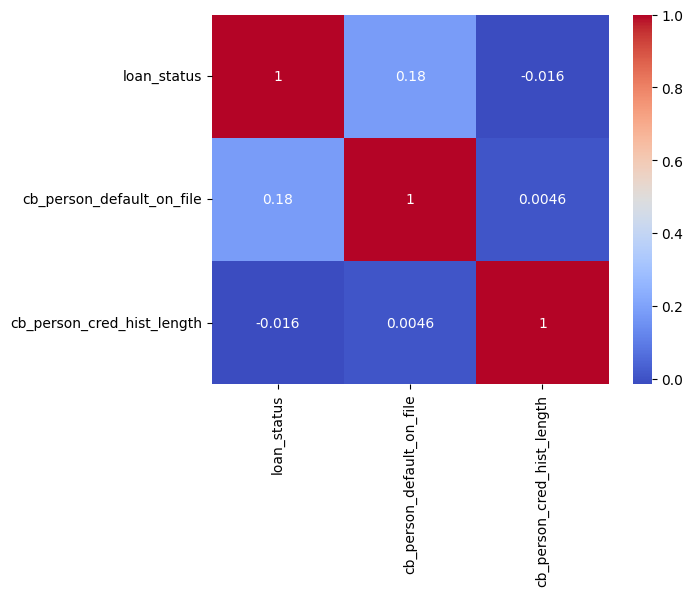

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data["cb_person_default_on_file"] = data["cb_person_default_on_file"].map({"N":0, "Y":1})

sns.heatmap(data[["loan_status", "cb_person_default_on_file", "cb_person_cred_hist_length"]].corr(),
            annot=True, cmap="coolwarm")
plt.show();

# Ordinal Encoding

In [21]:
data["loan_grade"].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# define the order D is the lowest risk and G is the highest risk
grade_order = ['D', 'B', 'C', 'A', 'E', 'F', 'G']

oe = OrdinalEncoder(categories=[grade_order])
data["loan_grade"] = oe.fit_transform(data[["loan_grade"]])

data["loan_grade"] = data["loan_grade"].astype(int)

In [23]:
data["loan_grade"].unique()

array([0, 1, 2, 3, 4, 5, 6])

# Feature Encoding- One-Hot Encoding

In [24]:
data_encoding = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent"], drop_first=True)

# converting dtypes
bool_cols = data_encoding.select_dtypes(include=["bool"]).columns
data_encoding[bool_cols] = data_encoding[bool_cols].astype(int)

In [25]:
print(data_encoding.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  int64  
 1   person_income                32581 non-null  int64  
 2   person_emp_length            32581 non-null  float64
 3   loan_grade                   32581 non-null  int64  
 4   loan_amnt                    32581 non-null  int64  
 5   loan_int_rate                32581 non-null  float64
 6   loan_percent_income          32581 non-null  float64
 7   cb_person_default_on_file    32581 non-null  int64  
 8   cb_person_cred_hist_length   32581 non-null  int64  
 9   loan_status                  32581 non-null  int64  
 10  person_home_ownership_OTHER  32581 non-null  int64  
 11  person_home_ownership_OWN    32581 non-null  int64  
 12  person_home_ownership_RENT   32581 non-null  int64  
 13  loan_intent_EDUC

# Handlin Unbalanced- SMOTE

Note- Gonna use SMOTE to disrupt the imbalance which is in loan status. Though the 0, 1 difference doesnt looks that complex but still we'll handle

In [26]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# # define x, y
# X = data_encoding.drop("loan_status", axis=1)
# y = data_encoding["loan_status"]

# # split the data
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# # validation set
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

# # re-attach the names
# X_train_sampled = pd.DataFrame(X_train_sampled, columns=X_train.columns)

# # check the new balance
# print(y_train_sampled.value_counts())


In [35]:
from sklearn.model_selection import train_test_split

# defien X, y
X = data_encoding.drop("loan_status", axis=1)
y = data_encoding["loan_status"]

# spilt the train data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# split the data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# re-attach the names
X_train = pd.DataFrame(X_train, columns=X_train.columns)

# Check the balance
print(y_train.value_counts())

loan_status
0    20401
1     5663
Name: count, dtype: int64


# Data Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [39]:
# Convert back to df to keep features
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_test.columns)

# ML

In [ ]:
import numpy as np
from scipy.stats import randint, uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
# initialize the model
model = LogisticRegression(max_iter=5000)

# define hyperparameter
param_grid = [
    {
        "penalty": ["l1", "l2"],
        "C": np.logspace(-4, 4, 10),
        "solver": ["liblinear", "saga"]
    },
    {
        "penalty": ["l2"],
        "C": np.logspace(-4, 4, 10),
        "solver": ["lbfgs", "newton-cg", "sag"]
    }
]

# grid search execution
clf = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="accuracy"
)

best_clf = clf.fit(X_train_scaled, y_train)

# model selection and prediction
final_model = best_clf.best_estimator_
y_pred = final_model.predict(X_test_scaled)

# final evaluation
print(best_clf.best_params_)
print("\n")

# pred val
y_pred_val = final_model.predict(X_val_scaled)

# classification report
train_acc = final_model.score(X_train_scaled, y_train)
val_acc = final_model.score(X_val_scaled, y_val)
report_str = classification_report(y_val, y_pred_val)

# Combine them into a single block of text for the AI
metrics_payload = f"""
Model: Logistic Regression
Train Accuracy: {train_acc:.2f}
Validation Accuracy: {val_acc:.2f}
Classification Report:
{report_str}
"""

# initialize the groq ai
llm = ChatGroq(model="llama-3.3-70b-versatile", api_key="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")

# Define the diagnostic prompt
prompt = ChatPromptTemplate.from_template("""
As a Data Scientist. Analyze the following model metrics and provide:
1. A summary of performance
2. Potential issues (Overfitting, Underfitting, Bias)
3. 3 Actionable steps to imporve the model
""")

chain = prompt | llm

response = chain.invoke({"metrics": metrics_payload})
print(response.content)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
{'C': np.float64(0.046415888336127774), 'penalty': 'l1', 'solver': 'liblinear'}




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


To provide a comprehensive analysis, I'll need the specific model metrics. However, since you haven't provided them, I'll create a hypothetical scenario with common metrics used in machine learning model evaluation. Let's assume we're dealing with a classification problem and have the following metrics:

- **Accuracy:** 92%
- **Precision:** 90%
- **Recall:** 95%
- **F1 Score:** 92.5%
- **Training Accuracy:** 98%
- **Validation Accuracy:** 88%
- **Mean Squared Error (MSE):** 0.05

### 1. Summary of Performance

The model shows a high accuracy of 92%, indicating good performance on the test set. The precision and recall scores suggest that the model is slightly more inclined towards reducing false negatives (with a higher recall), which might be desirable depending on the context of the problem (e.g., in medical diagnosis, it's often more important to identify all potential cases). The F1 score, balancing precision and recall, is also high, supporting the notion of good performance. Howe

# Random Forest Classifier

In [ ]:
import numpy as np
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate


# Hyperparameter space
param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": randint(1, 10),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_samples": uniform(0.5, 0.4),
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", "balanced_subsample"]
}

# randomized search for randomclassifier
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter = 20,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="recall",
    random_state=42
)

rf_search.fit(X_train_scaled, y_train)

# final tree selection
final_rf = rf_search.best_estimator_
y_pred = final_rf.predict(X_test_scaled)

# metrics
train_acc = final_rf.score(X_train_scaled, y_train)
val_acc = final_rf.score(X_val_scaled, y_val)
y_pred_val = final_rf.predict(X_val_scaled)
y_prob_val = final_rf.predict_proba(X_val_scaled)[:, 1]
report_str = classification_report(y_val, y_pred_val)
auc_score = roc_auc_score(y_val, y_prob_val)

# get top features to help AI give better recommendation
feature_importances = final_rf.feature_importances_
indices = np.argsort(feature_importances)[-5:]
top_features_list = [(X_train.columns[i], round(feature_importances[i], 4)) for i in indices[::-1]]

# Package the Context for Groq
metrics_payload = f"""
Model: Random Forest Classifier
Best Parameters: {rf_search.best_params_}
Train Accuracy (SMOTE): {train_acc:.2f}
Validation Accuracy (Real): {val_acc:.2f}
ROC AUC Score: {auc_score:.2f}
Classification Report:
{report_str}
"""

# Initialize Groq AI (Added Changes)
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    api_key="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"
)

prompt = ChatPromptTemplate.from_template("""
You are an expert Machine Learning Diagnostic Agent.
Analyze these metrics and provide your report in exactly this format:

1. SUMMARY
Briefly explain how the model is performing overall.

2. HYPOTHESIS
Based on the Train/Val gap and the classification report, what is the 'root cause' of any performance issues?

3. RECOMMENDATIONS
Provide specific, technical steps to fix the issues identified.

Metrics to analyze:
{metrics}
""")

# Run the Diagnosis
chain = prompt | llm
response = chain.invoke({"metrics": metrics_payload})

# Final Outputs
print("Best Parameters: ", rf_search.best_params_)
print("\nROC AUC Score: ", auc_score)
print("\n")
print("Top Features:", [f[0] for f in top_features_list])
print("AI DIAGNOSTIC REPORT:")
print(response.content)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:  {'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'sqrt', 'max_samples': np.float64(0.5733739159464655), 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 120}

ROC AUC Score:  0.8988595746038068


Top Features: ['loan_percent_income', 'loan_int_rate', 'loan_grade', 'person_income', 'person_home_ownership_RENT']
AI DIAGNOSTIC REPORT:
1. SUMMARY
The model is performing well overall, with a train accuracy and validation accuracy of 0.86, indicating a good fit to the data. The ROC AUC score of 0.90 also suggests that the model is able to distinguish between classes effectively. However, there is a noticeable difference in performance between the two classes, with class 0 having a higher precision and recall.

2. HYPOTHESIS
Based on the metrics, the 'root cause' of the performance issue appears to be class imbalance. Despite using class weighting and SMOTE for oversampling the minority cl

# XGBoost

In [47]:
from scipy.stats import randint, uniform
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

# cal scale_pos_weight
ratio = float(y_train.value_counts()[0] / y_train.value_counts()[1])

# hyperparameter
param_dist_xgb = {
    "n_estimators": randint(500, 1000),
    "max_depth": randint(3, 6),
    "learning_rate": uniform(0.01, 0.09),
    "subsample": uniform(0.6, 0.3),
    "colsample_bytree": uniform(0.6, 0.3),
    "scale_pos_weight": [ratio, ratio * 0.9],
    "gamma": uniform(0, 5),
    "reg_lambda": uniform(1, 20),
    "scale_pos_weight": [ratio, ratio * 0.8]
}

# randomized search
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=25,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="average_precision",
    random_state=42

)

xgb_search.fit(X_train_scaled, y_train)
final_xgb = xgb_search.best_estimator_

# threshold tuning
y_prob_val = final_xgb.predict_proba(X_val_scaled)[:, 1]
threshold = 0.35
y_pred_tuned = (y_prob_val >= threshold).astype(int)

# metrics
# y_pred_val = final_xgb.predict(X_val_scaled)
# y_prob_val = final_xgb.predict_proba(X_val_scaled)[:, 1]

# extract info for the payload
train_acc = final_xgb.score(X_train_scaled, y_train)
val_acc_tuned = (y_pred_tuned == y_val).mean()
report_str = classification_report(y_val, y_pred_tuned)
auc_score = roc_auc_score(y_val, y_prob_val)

# feature importance
importance = final_xgb.get_booster().get_score(importance_type="weight")
top_features = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:5]

# confusion matrix
cm = confusion_matrix(y_val, y_pred_tuned)
print(cm)
print("\n")
# Package the Context for Groq
metrics_payload = f"""
Model: XGBoost Classifier
Best Parameters: {xgb_search.best_params_}
Train Accuracy : {train_acc:.2f}
Validation Accuracy (Tuned): {val_acc_tuned:.2f}
ROC AUC Score: {auc_score:.2f}
Classification Report:
{report_str}
"""

# Initialize Groq AI (Added Changes)
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    api_key="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"
)

prompt = ChatPromptTemplate.from_template("""
You are a Lead Data Scientist. We have MOVED AWAY from Random Forest and SMOTE.
The current model is XGBOOST using 'scale_pos_weight'.

Analyze these SPECIFIC XGBoost metrics:
{metrics}

1. SUMMARY: Acknowledge the XGBoost output.
2. HYPOTHESIS: Explain why XGBoost is performing better/worse.
3. RECOMMENDATIONS: Give XGBoost-specific advice.
STRICTLY FORBIDDEN: Do not suggest SMOTE or 'collecting more data'.
"""
)

# Run the Diagnosis
chain = prompt | llm
response = chain.invoke({"metrics": metrics_payload})

# Final Outputs
print("Best Parameters: ", xgb_search.best_params_)
print("\nROC AUC Score: ", auc_score)
print("\n")
print("Top Features:", [f[0] for f in top_features])
print("AI DIAGNOSTIC REPORT:")
print(response.content)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [14:50:54] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[3631  443]
 [ 159  980]]


Best Parameters:  {'colsample_bytree': np.float64(0.7835558684167139), 'gamma': np.float64(0.6974693032602092), 'learning_rate': np.float64(0.03629301836816963), 'max_depth': 5, 'n_estimators': 689, 'reg_lambda': np.float64(2.812128690656416), 'scale_pos_weight': 2.8820060038848667, 'subsample': np.float64(0.6599021346475079)}

ROC AUC Score:  0.9533218426622841


Top Features: ['person_income', 'loan_int_rate', 'loan_amnt', 'loan_percent_income', 'person_emp_length']
AI DIAGNOSTIC REPORT:
### 1. SUMMARY
The XGBoost classifier has achieved a ROC AUC Score of **0.95**, indicating excellent performance in distinguishing between classes. The `scale_pos_weight` used is **2.8820060038848667**, which helps to balance the model by assigning more weight to the minority class.

### 2. HYPOTHESIS
XGBoost is likely performing better than a standard forest due to its ability to handle complex interactions between features and its robustness to outliers. The use of `sca

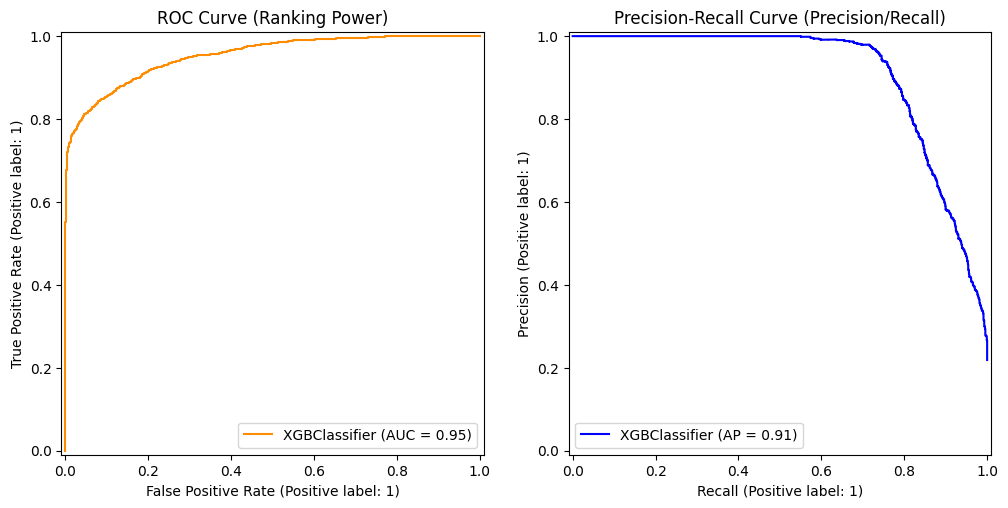

In [46]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
RocCurveDisplay.from_estimator(final_xgb, X_val_scaled, y_val, ax=ax1, color="darkorange")
ax1.set_title("ROC Curve (Ranking Power)")

# Percision-Recall Curve
PrecisionRecallDisplay.from_estimator(final_xgb, X_val_scaled, y_val, ax=ax2, color="blue")
ax2.set_title("Precision-Recall Curve (Precision/Recall)")

plt.show()